In [23]:
# Jun Tu 21-732-722
# Guanda Zhao 21-716-345

In [24]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import scipy.stats as sts

In [25]:
data_base_path = "Data/"
data_rnd_base_path = "Data Random/"

G_terrorists = nx.read_gml(data_base_path + "graph_terrorists.gml")
G_terrorists_rnd = nx.read_gml(data_rnd_base_path + "graph_terrorists_random.gml")
G_polblog = nx.read_gml(data_base_path + "graph_polblog.gml")
G_polblog_rnd = nx.read_gml(data_rnd_base_path + "graph_polblog_random.gml")
G_jazz = nx.read_gml(data_base_path + "graph_jazz_collab.gml")
G_jazz_rnd = nx.read_gml(data_rnd_base_path + "graph_jazz_collab_random.gml")
G_florida = nx.read_graphml(data_base_path + "Florida_foodweb.graphml")

print("Loading is done")

## thread unsafe
figure_uni_index=0
def new_figure():
    global figure_uni_index
    figure_uni_index = figure_uni_index + 1
    fig = plt.figure(figure_uni_index)
    return fig


Loading is done


In [26]:
def centrality(G):
    d_c = nx.degree_centrality(G)
    c_c = nx.closeness_centrality(G)
    b_c = nx.betweenness_centrality(G)
    e_c = nx.eigenvector_centrality(G)
    
    node = G.nodes()
    
    degree_c = [d_c[n] for n in node]
    closeness_c = [c_c[n] for n in node]
    betweenness_c = [b_c[n] for n in node]
    eigenvector_c = [e_c[n] for n in node]
    
    return degree_c, closeness_c, betweenness_c, eigenvector_c

In [71]:
def graph_correlation(G, title):
    degree_c,closeness_c,betweenness_c,eigenvector_c = centrality(G)
    c_array = np.array([degree_c, closeness_c, betweenness_c, eigenvector_c])

    label = ["degree centrality", "closeness centrality", "betweenness centrality", "eigenvector centrality"]
    x=0
    y=x+1
    while(x<len(c_array)):
        while(y<len(c_array)):
            fig = new_figure()
            ax = fig.add_subplot()                        
            ax.title.set_text(title + " " +label[x] + "-" +label[y])
            ax.set_xlabel(label[x])
            ax.set_ylabel(label[y])
            ax.scatter(c_array[x],c_array[y])
            spearman = sts.spearmanr(c_array[x], c_array[y])
            pearson = sts.pearsonr(c_array[x], c_array[y])
            kendall = sts.kendalltau(c_array[x], c_array[y])
            props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
            textstr = '\n'.join((
                r'$\mathrm{Spearman}=%.5f$' % (spearman[0]),
                r'$\mathrm{Pearson}=%.5f$' % (pearson[0]),
                r'$\mathrm{Kendall}=%.5f$' % (kendall[0])))
            ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)
            y=y+1
        x=x+1
        y=x+1

In [35]:
def compare_original_random_centrality(G, G_rnd, graph_title, g_label="origin", r_rnd_label="random"):
    degree_c,closeness_c,betweenness_c,eigenvector_c = centrality(G)
    rnd_degree_c,rnd_closeness_c,rnd_betweenness_c,rnd_eigenvector_c = centrality(G_rnd)
    c_array = np.array([degree_c, closeness_c, betweenness_c, eigenvector_c])
    rnd_c_array  = np.array([rnd_degree_c,rnd_closeness_c,rnd_betweenness_c,rnd_eigenvector_c])
    
    title = ["degree centrality", "closeness centrality", "betweenness centrality", "eigenvector centrality"]
    for i in range(0, len(c_array)):
        new_figure()
        plt.title(graph_title+" - "+title[i])
        plt.xlabel(g_label)
        plt.ylabel(r_rnd_label)
        plt.scatter(c_array[i], rnd_c_array[i])

In [29]:
def page_rank(G):
    pr = []
    pr85 = []
    pr_dict = []
    spearman = []
    value = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.99]
    pr85_dict = nx.pagerank(G, alpha = 0.85)
    for i in range(0, len(value)):
        pr_dict.append(nx.pagerank(G, alpha = value[i]))
    
    pr85 = [pr85_dict[i] for i in pr85_dict]
    for i in range(0, len(value)):
        pr = [pr_dict[i][j] for j in pr_dict[i]]
        spearman.append(sts.spearmanr(pr, pr85)[0])
        
    plt.xlabel('alpha')
    plt.ylabel('Spearman Correlation Coefficient')
    plt.scatter(value, spearman)  

## Output
### A03.01 - 1,2,3

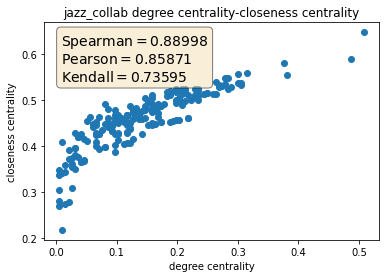

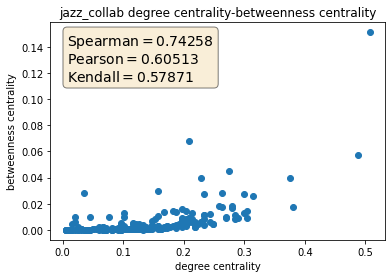

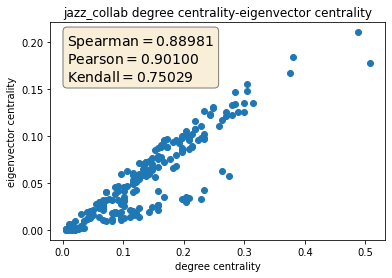

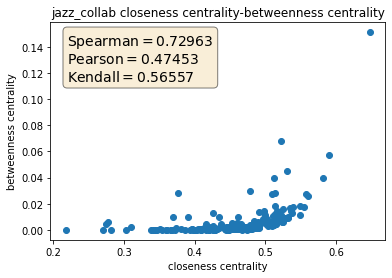

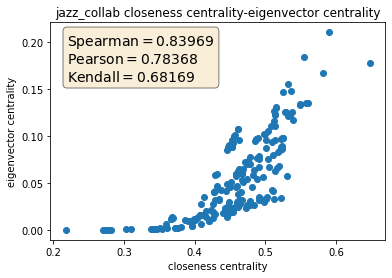

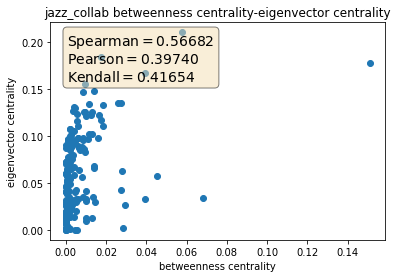

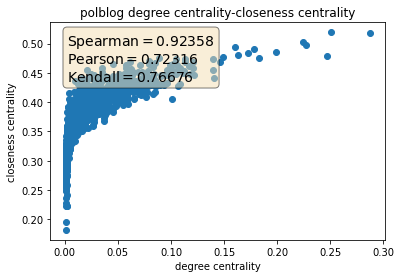

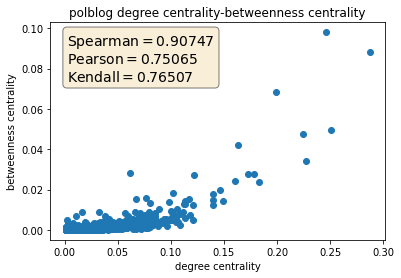

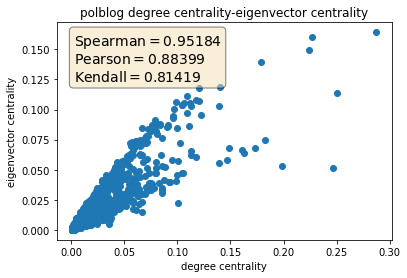

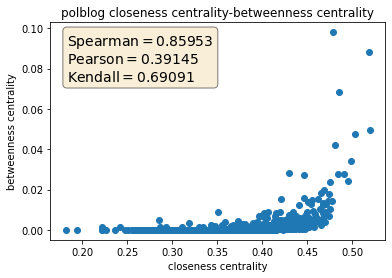

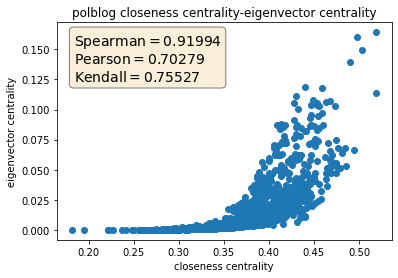

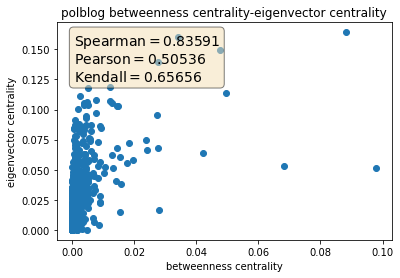

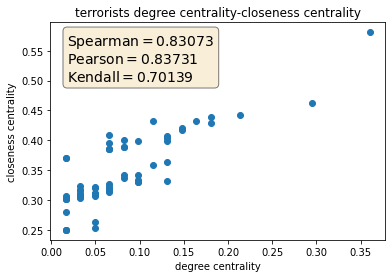

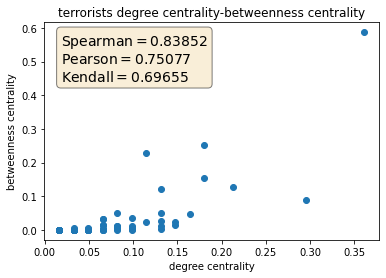

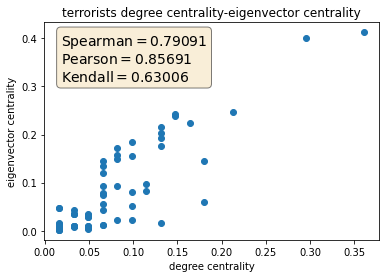

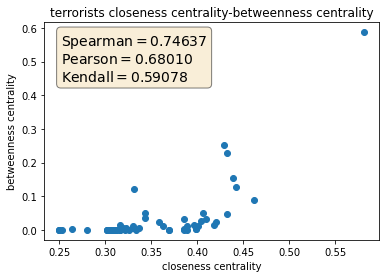

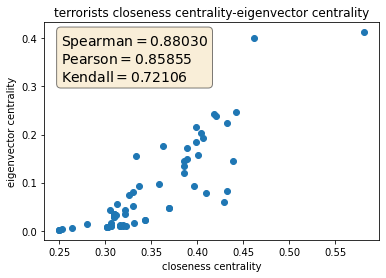

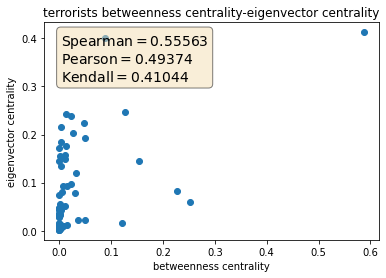

In [72]:
# centrality outputs are too many. 
## Computing centrality is the function centrality(G)
### centrality(G_jazz)
### centrality(G_polblog)
### centrality(G_terrorists)
graph_correlation(G_jazz, "jazz_collab")

graph_correlation(G_polblog, "polblog")

graph_correlation(G_terrorists, "terrorists")

### A03.01 - 4 
#### degree centrality
The degree centrality values are normalized by dividing by the maximum possible degree.(From API doc)
If the value is large, it means the node has a lot of connections to other nodes.
Most of the nodes in this graph have degree centrilities less than 0.25. And some nodes have degree centrilities close to 0.5. 
Noting that each node means one jazz musician, and the edge means two musicians had played in the same band, we can see most musicians had connections to up to 25% of other musicians. Considering it was unlikely one band had such a large number of people, so one musician was highly likely playing in several bands. 
And some musicians with 0.5 degree contrality were connected to more players, which means more bands. 
For example, most musicians played in different bands around one or some area. And some travelled across different communites to play. (Just an inference)

Degree centrality indicates the importance of a jazz musician to all other jazz musicians that he/she has collabrated with. Higher defree centrality means this jazz musician is more popular to all other jazz musicians that he/she has collabrated with.

#### closeness centrality
A high propotion of musicians' closeness contrality are around 0.35 to 0.55, which means on average, many musicians can reach  another in several steps.
For example, someone wanted to invite someone else to play. It is easily to transport the invitation through several people. 

Closeness centrality indicates the how close (i.e., how easily a jazz musician can collabrates with all other jazz musicians) of a jazz musician that he/she to all other jazz musicians in the network. Higher the closeness centrality, the jazz musician is easier to collabrates with all other jazz musicians.

#### betweenness centrality 
Most musicians have betweenness contrality around 0.01. In other words, It is possible that they were more connected to local, and weren't the ones who connect to the world.

Betweenness centrality indicates the importance of a jazz musician to all other jazz musicians for them to pass through him/her (i.e., introduce to other jazz musicians for them to collabrates). Higher betweenness centrality means this jazz musician is better for introducing a jazz musician to another.

#### eigenvector centrality
Only a small propotion of musicians had relatively high eigenvector contrality. And the max value is 0.2.
It means few people traveled across a lot of bands together. In other words, it wasn't highly likely that two people traveled across a lot of communities met at the same band.
And in the middle, the propotion of medium eigenvector contrality is not too small.
So we may infer that these part of people in a community connected to others with medium and high value a lot.
And for the people with low value, they might play in several bands. But other people in these bands were also mostly confined in a community.

Eigenvector centrality indicates the importance of a jazz musician to all other popular jazz musicians that have a lot of collabration. Higher eigenvector centrality means this jazz musician is more important for all other popular jazz musicians.

(array([54., 41., 25., 22., 29., 13.,  8.,  3.,  2.,  1.]),
 array([3.53345662e-06, 2.10439404e-02, 4.20843473e-02, 6.31247542e-02,
        8.41651611e-02, 1.05205568e-01, 1.26245975e-01, 1.47286382e-01,
        1.68326789e-01, 1.89367196e-01, 2.10407603e-01]),
 <BarContainer object of 10 artists>)

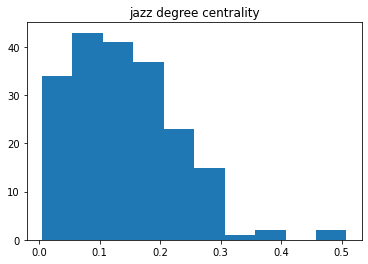

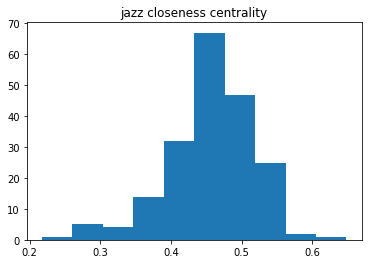

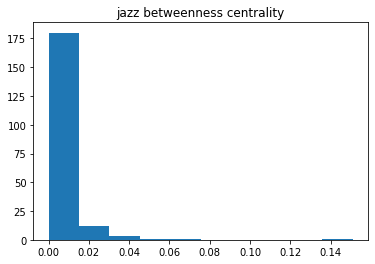

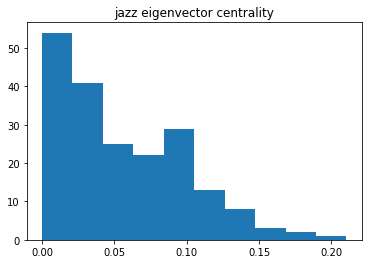

In [78]:
#"degree_c, closeness_c, betweenness_c, eigenvector_c")

new_figure()
plt.title("jazz degree centrality")
plt.hist(centrality(G_jazz)[0])

new_figure()
plt.title("jazz closeness centrality")
plt.hist(centrality(G_jazz)[1])

new_figure()
plt.title("jazz betweenness centrality")
plt.hist(centrality(G_jazz)[2])

new_figure()
plt.title("jazz eigenvector centrality")
plt.hist(centrality(G_jazz)[3])

### A03.02 - 1,2

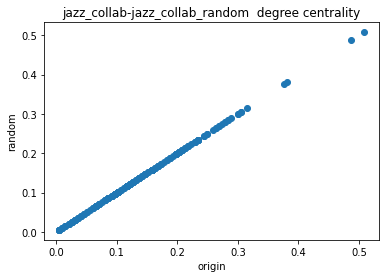

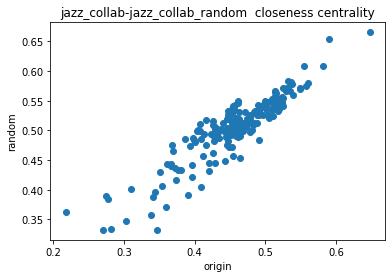

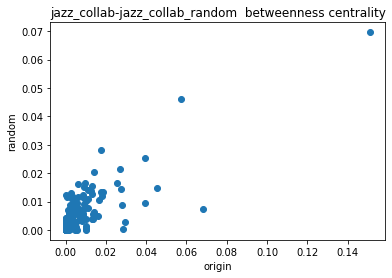

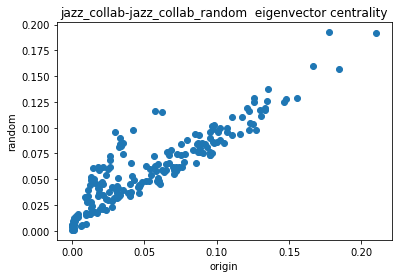

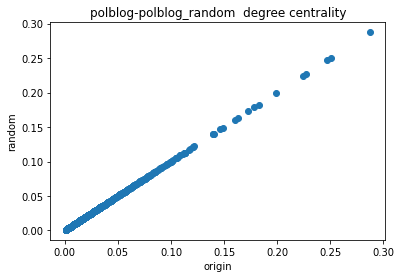

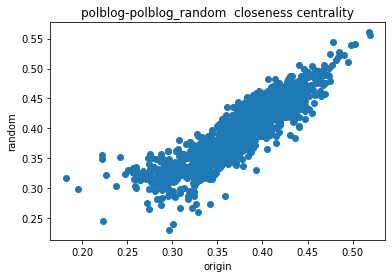

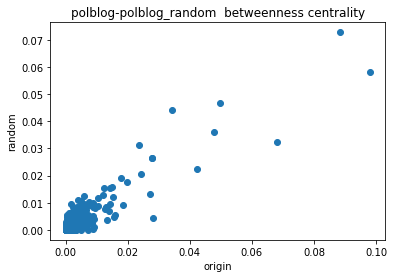

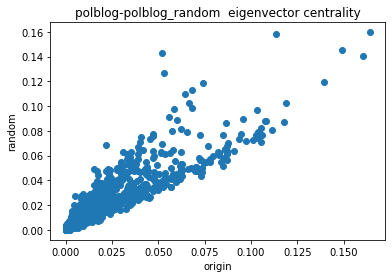

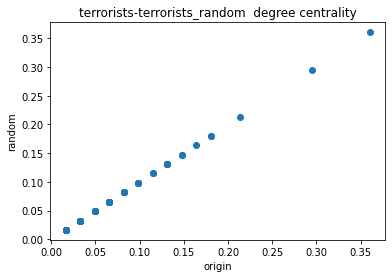

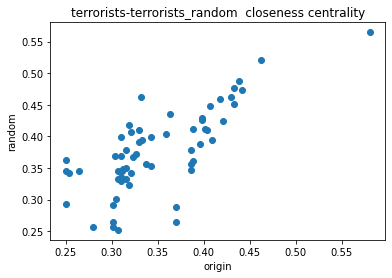

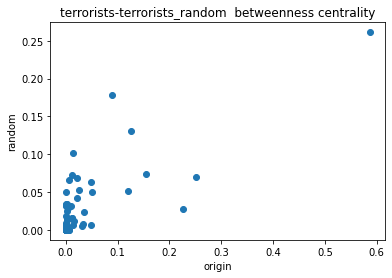

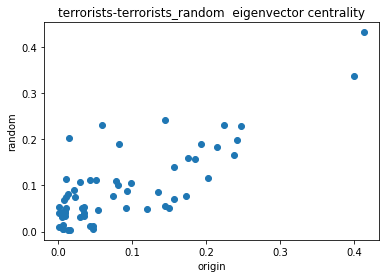

In [34]:
### use given randomised graph
compare_original_random_centrality(G_jazz, G_jazz_rnd, "jazz_collab")
compare_original_random_centrality(G_polblog, G_polblog_rnd, "polblog")
compare_original_random_centrality(G_terrorists, G_terrorists_rnd, "terrorists")

##  3.02 - 3
Becasue randomising does not change the degrees distribution of each node. In other words, the degree of every node does not change.
So according to the formula of degree centrality, the degree centrality would not change after randomised.

### A03.03

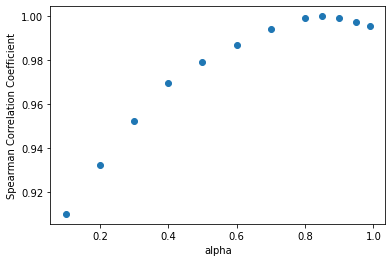

In [32]:
page_rank(G_florida)